In [129]:
import numpy as np
import matplotlib.pyplot as plt

Starting with some synthetic data to fit our regression. 

In [130]:
# start with a random seed so that we can go back to this data again. 
np.random.seed(62)
# The degree of the polynomial we will work with
polynomial_degree = 4
# The actual degree of the polynomial because python indexes from 0... 
polynomial_actual_degree = polynomial_degree +1
# The polynomial coefficients that we will be working with
weights = np.random.randn(polynomial_actual_degree)
# The x labels of the data which be be evenly distributed across the interval [0,100] and data that is transformed by our desired linear function, with some random noise added.
x = np.linspace(-2,2,100)
y = sum([weights[i]*x**(i) for i in range(polynomial_actual_degree)]) + np.random.randn(len(x))*1.3

<function matplotlib.pyplot.show(close=None, block=None)>

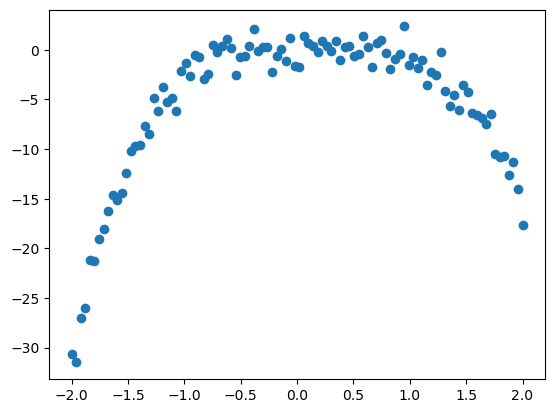

In [131]:
plt.scatter(x,y)
plt.show

This is the loss function, in this case it is a mean squared function that tells us how badly our regression function is doing  by computing the square of the distance between the prediction and the actual data. 

In [132]:
def loss( x_values, y_values, gradient):
    return (np.sum(sum([gradient[i]*x**(i) for i in range(polynomial_actual_degree)]) - y)**2)/len(x_values)

loss(x,y,np.zeros(polynomial_actual_degree))

2728.755168287441

Now we need to step the weights, this is done by differentiating with respect to the weights, then stepping them in the negative direction by the learning rates times the gradient. In this case I have manually performed the differentiation, as the model gets more complex a gradient vector would need to be calculated by some autodiff algorithm.


In [133]:
def optimizer(m_start, learning_rate, x_values, y_values):
    n = len(y_values)
    losses = (sum([m_start[j]*x_values**(j) for j in range(polynomial_actual_degree)])-y)
    m_grad = (np.array([sum(x_values**(i)*losses) for i in range(polynomial_actual_degree)])/n)
    m_new = m_start - (learning_rate * m_grad)
    return m_new,

Now a function that will run the decent a number of times, we might want to specify this in one of two ways, the first is where we stop seeing improvements, or a set number of iterations. In this case I will use a set number of iterations,

In [134]:
def gradient_decent_runner(m_start_guess, x_values, y_values ,learning_rate, iterations):
    losses = []
    m_final = m_start_guess
    for i in range(iterations):
        m_final,  = optimizer(m_final,learning_rate,x_values,y_values ) 
        if i % 10 == 0 :
            losses.append(loss(x_values, y_values, m_final))
    return m_final , losses
    

One will note here that the learning rate is very small, that is because the gradients are so high. When the learning rate is higher the algorithm begins to overshoot the optimization massively. The consequence of this is that we need a lot more iterations of the optimzer to be run in order to achieve the desired results. The number of iterations needed is so high that to stop too much memory being used the loss values are only be recorded every 10 iterations. 

[-0.09850226 -1.02002749 -0.04986571  1.32212598 -1.49842185]
where the mean square error between the weights founded by regression and the original function is 0.07034827260922669 


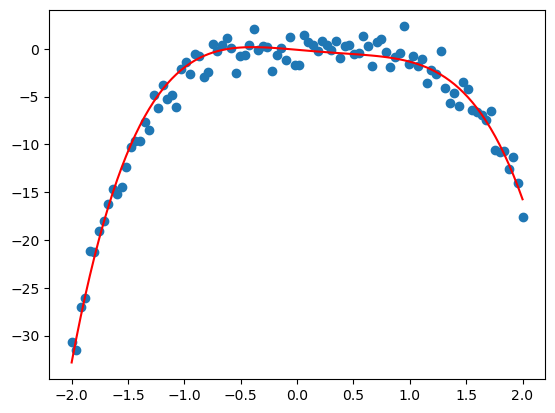

In [135]:

m_finalfinal, loss_final = gradient_decent_runner(np.random.randn(polynomial_actual_degree), x,y,0.00001,50000)

plt.scatter(x,y)
plt.plot(x,sum([m_finalfinal[i]*x**(i) for i in range(polynomial_actual_degree)]), '-r')
plt.show

print(m_finalfinal)

print(f"where the mean square error between the weights founded by regression and the original function is {sum((weights-m_finalfinal)**2)/polynomial_actual_degree} ")

A plot of the final losses to show how they decrease over time. 

<function matplotlib.pyplot.show(close=None, block=None)>

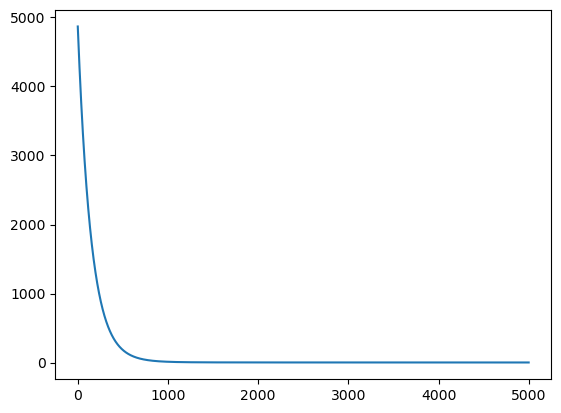

In [136]:
plt.plot(loss_final)
plt.show